In [7]:
import os
import shutil

# Path to the extracted dataset
source_path = '/content/dataset/TrashType_Image_Dataset/'

# Folder names for each class
class_folders = ['paper', 'plastic', 'metal', 'glass', 'cardboard', 'trash']

# Create the necessary class directories if they don't exist
for class_folder in class_folders:
    class_folder_path = os.path.join(source_path, class_folder)
    if not os.path.exists(class_folder_path):
        os.makedirs(class_folder_path)

# List all files in the source directory
file_list = os.listdir(source_path)

# Example logic to classify and move files into class directories
# You'll need to replace the conditions below based on how the images can be classified
for file in file_list:
    file_path = os.path.join(source_path, file)

    # Skip directories and only move files
    if os.path.isdir(file_path):
        continue

    # Example logic for classifying files based on the filename (you may need to adjust this)
    if 'paper' in file.lower():
        shutil.move(file_path, os.path.join(source_path, 'paper', file))
    elif 'plastic' in file.lower():
        shutil.move(file_path, os.path.join(source_path, 'plastic', file))
    elif 'metal' in file.lower():
        shutil.move(file_path, os.path.join(source_path, 'metal', file))
    elif 'glass' in file.lower():
        shutil.move(file_path, os.path.join(source_path, 'glass', file))
    elif 'cardboard' in file.lower():
        shutil.move(file_path, os.path.join(source_path, 'cardboard', file))
    elif 'trash' in file.lower():
        shutil.move(file_path, os.path.join(source_path, 'trash', file))

print("Files moved to their respective class folders.")


Files moved to their respective class folders.


In [6]:
import os

# Path where the dataset was extracted
extract_path = '/content/dataset/TrashType_Image_Dataset'

# List the contents of the extracted dataset
print("Extracted files:", os.listdir(extract_path))

# Optionally, you can list the contents of subdirectories to check folder structure
for root, dirs, files in os.walk(extract_path):
    print(f"Root: {root} | Directories: {dirs} | Files: {files}")


Extracted files: ['plastic', 'trash', 'metal', 'glass', 'paper', 'cardboard']
Root: /content/dataset/TrashType_Image_Dataset | Directories: ['plastic', 'trash', 'metal', 'glass', 'paper', 'cardboard'] | Files: []
Root: /content/dataset/TrashType_Image_Dataset/plastic | Directories: [] | Files: ['plastic_159.jpg', 'plastic_296.jpg', 'plastic_092.jpg', 'plastic_019.jpg', 'plastic_144.jpg', 'plastic_392.jpg', 'plastic_231.jpg', 'plastic_411.jpg', 'plastic_459.jpg', 'plastic_038.jpg', 'plastic_001.jpg', 'plastic_021.jpg', 'plastic_303.jpg', 'plastic_093.jpg', 'plastic_063.jpg', 'plastic_137.jpg', 'plastic_177.jpg', 'plastic_433.jpg', 'plastic_204.jpg', 'plastic_324.jpg', 'plastic_091.jpg', 'plastic_214.jpg', 'plastic_185.jpg', 'plastic_291.jpg', 'plastic_242.jpg', 'plastic_122.jpg', 'plastic_237.jpg', 'plastic_124.jpg', 'plastic_336.jpg', 'plastic_007.jpg', 'plastic_332.jpg', 'plastic_267.jpg', 'plastic_085.jpg', 'plastic_312.jpg', 'plastic_208.jpg', 'plastic_387.jpg', 'plastic_474.jpg', '

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import files

# 1. Upload the zip dataset
print("Please upload your dataset .zip file:")
uploaded = files.upload()  # For manual file upload

# 2. Extract the uploaded zip file
uploaded_zip_file = list(uploaded.keys())[0]  # Get the uploaded file name
extract_path = '/content/dataset'

# Extract the zip file
with zipfile.ZipFile(uploaded_zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print("Dataset extracted to:", extract_path)
print("Extracted files:", os.listdir(extract_path))

# Ensure the directory structure is correct
for folder in ['paper', 'plastic', 'metal', 'glass', 'cardboard', 'trash']:
    folder_path = os.path.join(extract_path, folder)
    if not os.path.exists(folder_path):
        print(f"WARNING: '{folder}' folder not found in the dataset.")

# 3. Data Augmentation and Loading
image_size = (128, 128)  # Resize all images to 128x128 pixels
batch_size = 32          # Number of images per batch

data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

train_data = data_gen.flow_from_directory(
    '/content/dataset/TrashType_Image_Dataset',  # Correct path to the dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=['paper', 'plastic', 'metal', 'glass', 'cardboard', 'trash']  # Classes based on the folder structure
)

val_data = data_gen.flow_from_directory(
    '/content/dataset/TrashType_Image_Dataset',  # Correct path to the dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['paper', 'plastic', 'metal', 'glass', 'cardboard', 'trash']  # Classes based on the folder structure
)

# 4. Define the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 categories: paper, plastic, metal, glass, cardboard, trash
])


# 5. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# 7. Evaluate the Model
loss, accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {accuracy:.2f}')


Please upload your dataset .zip file:


Saving Garbage dataset.zip to Garbage dataset.zip
Dataset extracted to: /content/dataset
Extracted files: ['TrashType_Image_Dataset']
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2434 - loss: 1.7867 - val_accuracy: 0.3499 - val_loss: 1.5201
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.3407 - loss: 1.5678 - val_accuracy: 0.4115 - val_loss: 1.3855
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.4065 - loss: 1.4308 - val_accuracy: 0.5149 - val_loss: 1.3122
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4579 - loss: 1.3396 - val_accuracy: 0.5109 - val_loss: 1.2882
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4737 - loss: 1.3594 - val_accuracy: 0.4851 - val_loss: 1.2439
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4934 - loss: 1.2890 - val_accuracy: 0.5328 - val_loss: 1.1817
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4847 - loss: 1.2567 - val_accuracy: 0.4831 - val_loss: 1.2583
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4749 - loss: 1.2870 - val_accuracy: 0.5567 - val_loss: 1.1470
Epo

In [2]:
import os

# Path where the dataset was extracted
extract_path = '/content/dataset'

# List the contents of the extracted dataset
print("Extracted files:", os.listdir(extract_path))

# Ensure the directory structure is correct
for folder in ['paper', 'plastic', 'metal' ,'glass', 'carboard', 'trash']:
    folder_path = os.path.join(extract_path, folder)
    if not os.path.exists(folder_path):
        print(f"WARNING: '{folder}' folder not found in the dataset.")
    else:
        print(f"'{folder}' folder is found.")


Extracted files: ['TrashType_Image_Dataset']


In [8]:
# Assuming you've already uploaded the dataset and it is in '/content/dataset'

# Data Augmentation and Loading
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (128, 128)  # Resize all images to 128x128 pixels
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

train_data = data_gen.flow_from_directory(
    extract_path,          # Path to extracted dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=['paper', 'plastic', 'metal' ,'glass', 'carboard', 'trash']
)

val_data = data_gen.flow_from_directory(
    extract_path,          # Path to extracted dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['paper', 'plastic', 'metal' ,'glass', 'carboard', 'trash']
)

# Define the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
Dense(6, activation='softmax')  # 6 categories: paper, plastic, metal, glass, cardboard, trash
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Found 1701 images belonging to 6 classes.
Found 423 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.2421 - loss: 1.6182 - val_accuracy: 0.3641 - val_loss: 1.4303
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.3179 - loss: 1.4630 - val_accuracy: 0.3522 - val_loss: 1.4060
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.3763 - loss: 1.3904 - val_accuracy: 0.4043 - val_loss: 1.3478
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4297 - loss: 1.3298 - val_accuracy: 0.4232 - val_loss: 1.3951
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4442 - loss: 1.2745 - val_accuracy: 0.5154 - val_loss: 1.2088
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4859 - loss: 1.2362 - val_accuracy: 0.5154 - val_loss: 1.2419
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4479 - loss: 1.2769 - val_accuracy: 0.5414 - val_loss: 1.1494
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5026 - loss: 1.1790 - val_accuracy: 0.5650 - val_loss: 1.1322
Epo

In [9]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.6401 - loss: 1.0261
Validation accuracy: 0.61


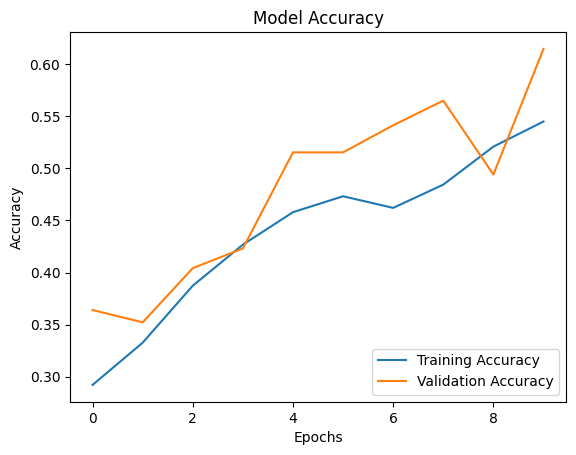

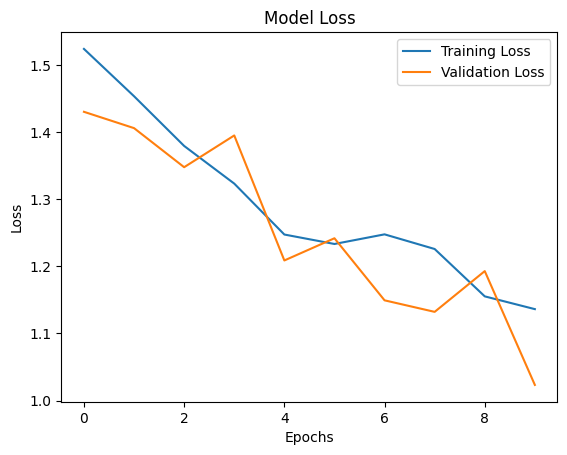

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
